In [189]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
import epics
import time as ttime

%run -i lakeshore_comm.py



# Calibration Table information
## Omega Thermistor Model(s) XXXX

This was developed for the thermistors used at CSX-1 for the mono DI water temperature.  The temperature response of the thermister is given by the Steinhart-Heart equation:

$$\frac{1}{T} = A + B \ln(R) + C [\ln(R)]^3$$

Applicable specific models:
* TH-21B-2252  
    * a = 1.4705e-3
    * b = 2.3780e-4
    * c = 1.0389e-7

## Usage recommendations:
The notebook needs write permission to epics.  One way to ensure this is to use a beamline workstation and execute the following commands before opening the notebook.
```shell
source activate collection
ipython notebook
```

The Lakeshore 336 calibration tables 21 - 59 are reserved for users.  First check to make sure that you are not about to overwrite a calibration.  The temperature column should be in decreasing order.

In [190]:
def steinhart_hart(R, a, b, c):
    t = a + (b * np.log(R)) + (c * (np.log(R))**3)
    tt = 1.0 / t
    return tt

In [191]:

r = np.linspace(1000, 4000, 200)
a = 1.4705e-3
b = 2.3780e-4
c = 1.0389e-7

t = steinhart_hart(r, a, b, c)
tempK = t 

In [192]:
tempK.shape

(200,)

<IPython.core.display.Javascript object>


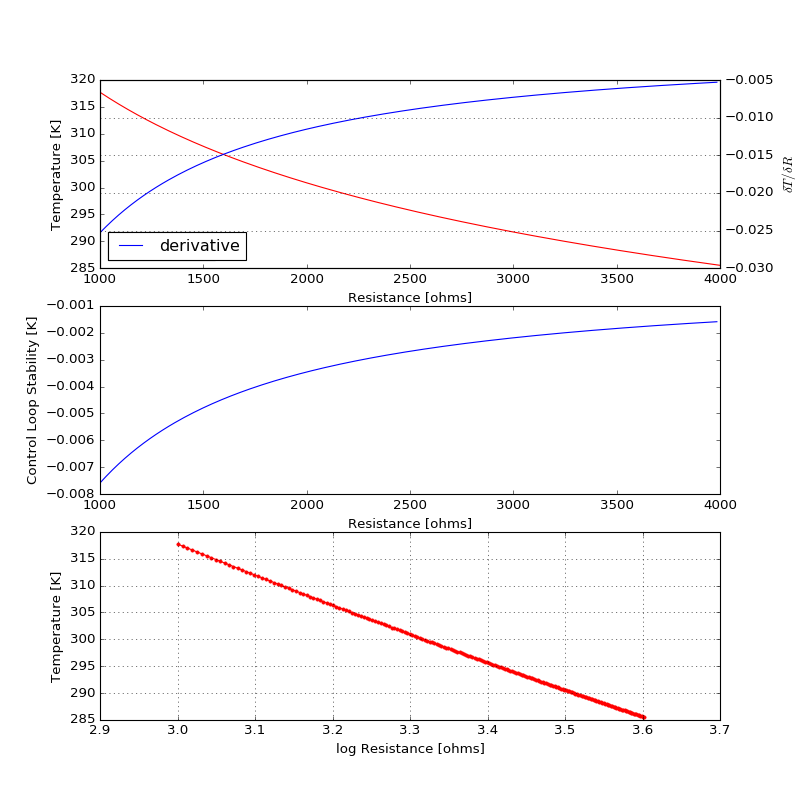

In [193]:
fig, ax = plt.subplots(3,1, figsize=(10,10))
ax1 = ax[0]
ax1.plot(r, tempK, 'r-',label='R vs T')
ax1.set_ylabel('Temperature [K]')
plt.grid(True)
ax1.legend(loc=3)
ax2 = ax1.twinx()
ax2.plot(r[:-1], np.diff(tempK) / np.diff(r), 'b-',label='derivative')
ax2.set_ylabel('$\delta T / \delta R$')
ax1.set_xlabel('Resistance [ohms]')
plt.legend(loc=5)


ax1 = ax[1]
ax1.plot(r[:-1], 0.3 * np.diff(tempK) / np.diff(r))
ax1.set_ylabel('Control Loop Stability [K]')
ax1.set_xlabel('Resistance [ohms]')
plt.grid(True)

ax1 = ax[2]
ax1.plot(np.log10(r), tempK, 'r.-',label='log(R) vs T')
ax1.set_ylabel('Temperature [K]')
ax1.set_xlabel('log Resistance [ohms]')
plt.grid(True)
plt.legend(loc=3)




## Create data to upload
This sensor is designed to upload log(R)


In [185]:
t = tempK
op = lakeshore_curv(30, 'TH-21B-2252', np.log10(r), t,4,9999, sn='STD')
op

['CRVDEL 30',
 'CRVHDR 30,TH-21B-2252,STD,4,9999,1',
 'CRVPT 30,1,3,317.722',
 'CRVPT 30,2,3.0065,317.34',
 'CRVPT 30,3,3.0129,316.966',
 'CRVPT 30,4,3.01921,316.597',
 'CRVPT 30,5,3.02543,316.234',
 'CRVPT 30,6,3.03156,315.878',
 'CRVPT 30,7,3.03761,315.527',
 'CRVPT 30,8,3.04357,315.181',
 'CRVPT 30,9,3.04945,314.841',
 'CRVPT 30,10,3.05526,314.506',
 'CRVPT 30,11,3.06098,314.176',
 'CRVPT 30,12,3.06663,313.851',
 'CRVPT 30,13,3.07221,313.53',
 'CRVPT 30,14,3.07772,313.215',
 'CRVPT 30,15,3.08316,312.904',
 'CRVPT 30,16,3.08854,312.597',
 'CRVPT 30,17,3.09384,312.294',
 'CRVPT 30,18,3.09909,311.996',
 'CRVPT 30,19,3.10427,311.702',
 'CRVPT 30,20,3.10939,311.411',
 'CRVPT 30,21,3.11445,311.125',
 'CRVPT 30,22,3.11945,310.842',
 'CRVPT 30,23,3.12439,310.563',
 'CRVPT 30,24,3.12928,310.287',
 'CRVPT 30,25,3.13412,310.015',
 'CRVPT 30,26,3.1389,309.747',
 'CRVPT 30,27,3.14363,309.482',
 'CRVPT 30,28,3.1483,309.22',
 'CRVPT 30,29,3.15293,308.961',
 'CRVPT 30,30,3.15751,308.705',
 'CRVPT 3

In [169]:
ls_pv = 'XF:02ID-OP{TCtrl:1}' 

In [170]:
put_data(ls_pv,op)

In [101]:
np.log10(1863.88)

3.2704179482457345